In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from utils import load_dataframe_csv

import matplotlib.pyplot as plt
from itertools import count

In [2]:
df1 = load_dataframe_csv('tables', 'Explainability_CIFAR10.csv')
df2 = load_dataframe_csv('tables', 'Explainability_OCEA.csv')
df3 = load_dataframe_csv('tables', 'Explainability_MRI.csv')


In [3]:
df = pd.concat([df1, df2, df3])

In [4]:
df.head()

,data,explainer,scale,coverage,hit_rate,execution_time
0,CIFAR10,YADEA,False,0.903333,1.00,12.946430
1,CIFAR10,YADEA,True,0.206667,0.02,4.660745
2,CIFAR10,RPS,False,0.116667,0.01,2.136416
3,CIFAR10,IF,True,0.130000,0.02,200.735968
4,CIFAR10,TracIn,True,0.130000,0.02,44.333229


In [34]:
df['names'] = df['explainer'] +  ["*" if i else "" for i in df['scale'].to_list()]
df['names'][df['names']=='IF*'] = 'IF'

/var/folders/n8/l367zdkj0k7_lb73r33cz1s00000gn/T/ipykernel_6356/912552240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['names'][df['names']=='IF*'] = 'IF'


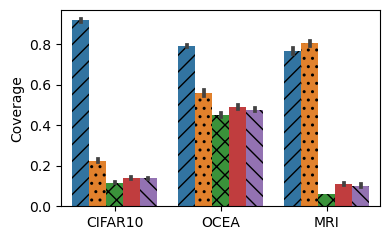

In [80]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(df, x='data', y='coverage', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\']
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Coverage')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/coverage.pdf', format='pdf')

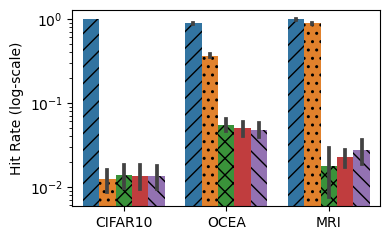

In [78]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(df, x='data', y='hit_rate', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel("")
plt.ylabel('Hit Rate (log-scale)')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/hitrate.pdf', format='pdf')

/var/folders/n8/l367zdkj0k7_lb73r33cz1s00000gn/T/ipykernel_6356/2497209861.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


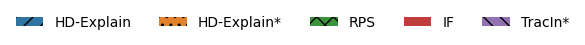

In [75]:
fig_leg = plt.figure(figsize=(6, 0.2))
ax_leg = fig_leg.add_subplot(111)
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=5, frameon=False)
ax_leg.axis('off')
plt.tight_layout()
fig_leg.savefig('plots/bar_legend.pdf', format='pdf')

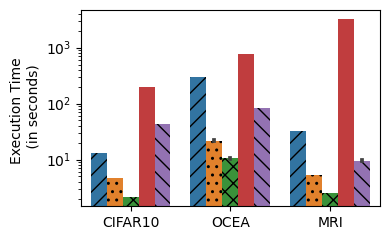

In [79]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(df, x='data', y='execution_time', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel("")
plt.ylabel('Execution Time \n (in seconds)')

# plt.legend(bbox_to_anchor=(0.6, 0.50))

plt.tight_layout()
plt.savefig('plots/time.pdf', format='pdf')